# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype = 'float')
data = data.astype(int)
data.shape


(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
y = data[:, 1];

Text(0, 0.5, 'Bénéfice x1000')

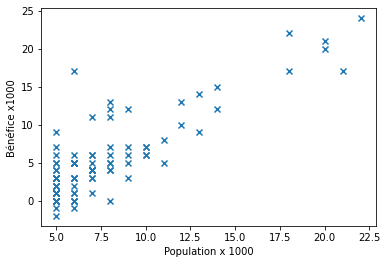

In [ ]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [ ]:
def computeCostNonVect(X, Y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
    m = len(Y)
    cost_sum = 0.0
    for x,y in zip(X, Y):
        y_pred = np.dot(theta.T, x)
        cost_sum += (y_pred - y) ** 2
    
    cost = cost_sum / (m * 2.0)
    
    return cost

In [ ]:
def computeCost(X, Y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
    m = (len(y))
    J =  1/(2*m) * (np.sum(np.power(np.dot(X, theta) - Y.reshape(m,1), 2)))

    
    return J 
    
  

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1
  costs = np.zeros(iterations)
  theta0 = np.zeros(iterations)
  theta1 = np.zeros(iterations)
  i = 0 
  derivative = 100
  seuil = 0.001 
  
  m = len(X)
  while(i<iterations and derivative > seuil):
    costs[i] = computeCost(X, y, theta)
    predictions = X.dot(theta)
    print(f"\n Iteration {i} : theta = {theta}")
    theta0[i] = theta[0]
    theta1[i] = theta[1]
    theta = theta - alpha*(1/m)*(X.T.dot((predictions - y.reshape(-1, 1))))
    derivative = np.abs((X.T.dot((predictions - y.reshape(-1, 1))))[0])
    i += 1
  
  return (theta, costs, theta0, theta1)



# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [ ]:
theta = np.zeros((2, 1))

Calculer le cout initial

In [ ]:
%%time
computeCostNonVect(X, y, theta)

CPU times: user 2.64 ms, sys: 1.02 ms, total: 3.65 ms
Wall time: 2.6 ms


array([29.25773196])

In [ ]:
%%time
computeCost(X, y, theta)


CPU times: user 205 µs, sys: 30 µs, total: 235 µs
Wall time: 175 µs


29.257731958762886

Appel des la fonction de calcul du gradient

In [ ]:
# paramètres
iterations = 1500;
alpha = 0.01;
# Appel
theta, costs, theta0, theta1 = gradientDescent(X, y, theta, alpha, iterations)


 Iteration 0 : theta = [[0.]
 [0.]]

 Iteration 1 : theta = [[0.05402062]
 [0.5914433 ]]

 Iteration 2 : theta = [[0.06183185]
 [0.73964488]]

 Iteration 3 : theta = [[0.05812137]
 [0.77722273]]

 Iteration 4 : theta = [[0.05154636]
 [0.78719038]]

 Iteration 5 : theta = [[0.04426743]
 [0.79026604]]

 Iteration 6 : theta = [[0.0368238 ]
 [0.79162047]]

 Iteration 7 : theta = [[0.02935002]
 [0.79254418]]

 Iteration 8 : theta = [[0.02187966]
 [0.79335925]]

 Iteration 9 : theta = [[0.01442106]
 [0.79414607]]

 Iteration 10 : theta = [[0.00697629]
 [0.79492471]]

 Iteration 11 : theta = [[-4.54151737e-04]
 [ 7.95700165e-01]]

 Iteration 12 : theta = [[-0.00787017]
 [ 0.7964737 ]]

 Iteration 13 : theta = [[-0.01527176]
 [ 0.79724562]]

 Iteration 14 : theta = [[-0.02265893]
 [ 0.79801602]]

 Iteration 15 : theta = [[-0.03003172]
 [ 0.7987849 ]]

 Iteration 16 : theta = [[-0.03739016]
 [ 0.79955229]]

 Iteration 17 : theta = [[-0.04473426]
 [ 0.80031819]]

 Iteration 18 : theta = [[-0.05

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

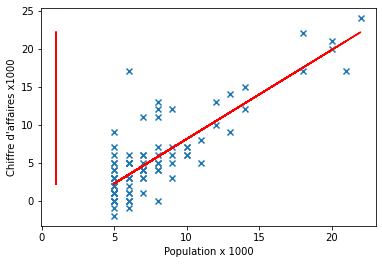

In [ ]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred, color = 'red')
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de theta0 et theta1

In [ ]:
y_pred = np.dot(X, theta)

In [ ]:
def plot_cost_iterations(theta0, theta1, costs):
  fig, ax1 = plt.subplots()


  ax1.set_xlabel('Iterations')
  ax1.tick_params(axis='y')

  ax2 = ax1.twinx()
  ax2.plot(costs, label='J(theta)')
  ax1.tick_params(axis='y')

  fig.legend();


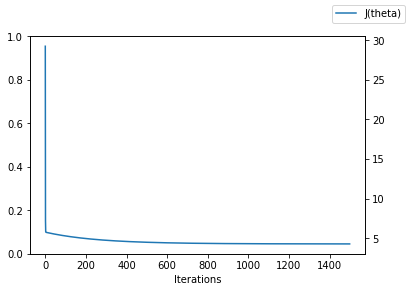

In [ ]:
plot_cost_iterations(theta0, theta1, costs)

In [ ]:
def plot_costs_theta(costs, thetha0, theta1):

  fig = plt.figure()
  ax = fig.gca(projection='3d')
  z = costs
  x = theta0
  y = theta1
  ax.plot(x, y, z, label='J (theta)')
  ax.legend()

plt.show()

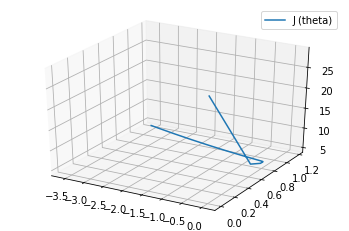

In [ ]:
plot_costs_theta(costs, theta0, theta1)

Prédire des valeurs de y

In [ ]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta);
predict1

array([0.49898053])

In [ ]:
predict2 = np.matmul([1, 7],theta);
predict2

array([4.59767717])

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [ ]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=float)
dataMulti = dataMulti.astype(int)
dataMulti.shape

(47, 3)

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [ ]:
# d'abord créer X et y
intercept=np.ones((dataMulti.shape[0],1))
X=np.column_stack((intercept,dataMulti[:,1::]))
y = dataMulti[:, 2];

Mise à l'échelle des données

In [ ]:
theta = np.zeros((3, 1))

In [ ]:
theta

array([[0.],
       [0.],
       [0.]])

In [ ]:
# redéfinissez vos fonctions de coût si cela est necessaire
computeCost(X,y,theta)

65591585744.68085

Cout initial trop grand !

Normalisation des données en moyenne = 0

In [ ]:
X_normalized = (X-np.mean(X))/np.std(X)

Appliquer la descente du gradient à plusieurs variables

Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul


#Sana la normalisation#


In [ ]:
%%time
theta = np.zeros((3, 1))
theta, costs, theta0, theta1 = gradientDescent(X, y, theta, alpha, 1500)


 Iteration 0 : theta = [[0.]
 [0.]
 [0.]]

 Iteration 1 : theta = [[3.40412766e+03]
 [1.12036809e+04]
 [1.31183171e+09]]

 Iteration 2 : theta = [[-4.46564262e+12]
 [-1.46973438e+13]
 [-1.72090245e+18]]

 Iteration 3 : theta = [[5.85817161e+21]
 [1.92804418e+22]
 [2.25753440e+27]]

 Iteration 4 : theta = [[-7.68493531e+30]
 [-2.52926950e+31]
 [-2.96150523e+36]]

 Iteration 5 : theta = [[1.00813419e+40]
 [3.31797594e+40]
 [3.88499648e+45]]

 Iteration 6 : theta = [[-1.32250240e+49]
 [-4.35262606e+49]
 [-5.09646159e+54]]

 Iteration 7 : theta = [[1.73490059e+58]
 [5.70991291e+58]
 [6.68569994e+63]]

 Iteration 8 : theta = [[-2.27589761e+67]
 [-7.49044484e+67]
 [-8.77051322e+72]]

 Iteration 9 : theta = [[2.98559466e+76]
 [9.82620309e+76]
 [1.15054374e+82]]

 Iteration 10 : theta = [[-3.91659776e+85]
 [-1.28903248e+86]
 [-1.50931976e+91]]

 Iteration 11 : theta = [[5.13791715e+094]
 [1.69099369e+095]
 [1.97997353e+100]]

 Iteration 12 : theta = [[-6.74008267e+103]
 [-2.21829915e+104]
 [-

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in power
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in subtract


On remarque que le modèle n'arrive pas a apprendre et que les valeurs de theta finissent par atteindre l'infini ceci est du la divergence des données.
Cette divergence cause l'explosion de notre gradient

#Affichage des valeurs de theta pour confirmer

In [ ]:
%%time
theta = np.zeros((3, 1))
theta, costs, theta0, theta1 = gradientDescent(X_normalized, y, theta, alpha, 1500)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 [-79854.72585807]
 [182053.83330591]]

 Iteration 251 : theta = [[-79869.35336253]
 [-79867.76575522]
 [182048.13510826]]

 Iteration 252 : theta = [[-79882.33214345]
 [-79880.74437336]
 [182042.34261452]]

 Iteration 253 : theta = [[-79895.25094282]
 [-79893.66301101]
 [182036.45888947]]

 Iteration 254 : theta = [[-79908.11102276]
 [-79906.52293028]
 [182030.48690986]]

 Iteration 255 : theta = [[-79920.91361003]
 [-79919.32535791]
 [182024.4295669 ]]

 Iteration 256 : theta = [[-79933.65989701]
 [-79932.07148624]
 [182018.28966874]]

 Iteration 257 : theta = [[-79946.3510427 ]
 [-79944.76247424]
 [182012.0699428 ]]

 Iteration 258 : theta = [[-79958.98817363]
 [-79957.39944845]
 [182005.7730381 ]]

 Iteration 259 : theta = [[-79971.57238486]
 [-79969.98350387]
 [181999.40152749]]

 Iteration 260 : theta = [[-79984.10474079]
 [-79982.51570491]
 [181992.95790985]]

 Iteration 261 : theta = [[-79996.58627612

#Differences dans le temps d'execution
Cette difference est due au fait que sans normalisation la mise a jour des valeurs de theta s'arrete au bout de quelque itteration car elle atteint l'infini

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_normalized, y)
reg.coef_


array([ 0.00000000e+00, -1.98556809e-05,  1.75646686e+05])

In [ ]:
reg.score(X_normalized, y)
y_pred = reg.predict(X_normalized)
y_pred

array([399900., 329900., 369000., 232000., 539900., 299900., 314900.,
       199000., 212000., 242500., 240000., 347000., 330000., 699900.,
       259900., 449900., 299900., 199900., 500000., 599000., 252900.,
       255000., 242900., 259900., 573900., 249900., 464500., 469000.,
       475000., 299900., 349900., 169900., 314900., 579900., 285900.,
       249900., 229900., 345000., 549000., 287000., 368500., 329900.,
       314000., 299000., 179900., 299900., 239500.])

In [ ]:
np.dot(X_normalized, theta)

array([[399971.6074902 ],
       [329546.66568539],
       [368884.02603636],
       [231052.84687613],
       [540820.99844206],
       [299364.05511129],
       [314455.60672721],
       [197852.0245104 ],
       [210930.94227415],
       [241616.0954891 ],
       [239100.42633832],
       [346750.4728977 ],
       [329647.27274511],
       [701791.80133816],
       [259121.72388058],
       [450274.64469302],
       [299365.04042679],
       [198757.48804789],
       [500678.78161332],
       [600279.77073726],
       [252079.2297001 ],
       [254192.47061199],
       [242018.52372798],
       [259121.23122283],
       [575027.891405  ],
       [249061.01790846],
       [464963.76807006],
       [469491.08575751],
       [475527.50934078],
       [299364.54776904],
       [349668.57028737],
       [168576.35544704],
       [314455.11406947],
       [581064.31498827],
       [285279.06675033],
       [249061.01790846],
       [228939.60596423],
       [344737.83904553],
       [5499

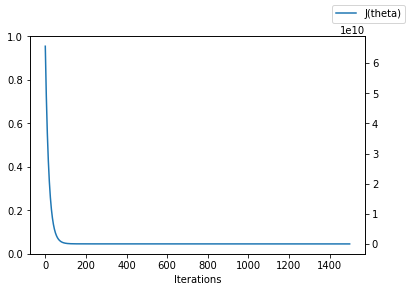

In [ ]:
plot_cost_iterations(theta0, theta1, costs)


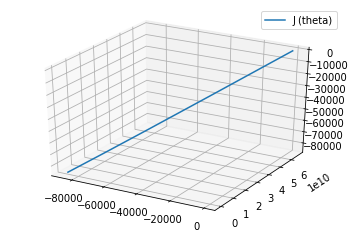

In [ ]:
plot_costs_theta(theta0, theta1, costs)


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

In [ ]:
#Changer differente valeurs pour alpha et/ou nombre d'iterations
#Plus de données pour l'apprentissage